In [61]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import requests
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedShuffleSplit
    import category_encoders as ce
    from sklearn.preprocessing import LabelEncoder
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


except ImportError as e:
    print(e)

# read data

In [62]:
df = pd.read_csv(r"Datasets\flight_data.csv",index_col=0)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [64]:
col_lst = []
for col in df.columns:
    if df[col].dtype== object:
        print(col,":",df[col].nunique())
        print(col,":",df[col].unique())
        col_lst.append(col)

        # df.nunique()

airline : 6
airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight : 1561
flight : ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city : 6
source_city : ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time : 6
departure_time : ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops : 3
stops : ['zero' 'one' 'two_or_more']
arrival_time : 6
arrival_time : ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city : 6
destination_city : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class : 2
class : ['Economy' 'Business']


In [65]:
mapping_values = {'zero': 0,'one': 1,'two_or_more': 2,"Economy":0,"Business":1,'Delhi':0 ,'Mumbai':1, 'Bangalore':2, 'Kolkata':3, 'Hyderabad':4, 'Chennai':5,'SpiceJet':0, 'AirAsia':1, 'Vistara':2, 'GO_FIRST':3, 'Indigo':4, 'Air_India':5,'Evening':1, 'Early_Morning':2, 'Morning':0, 'Afternoon':3, 'Night':4, 'Late_Night':5}
df['stops'] = df['stops'].replace(mapping_values).astype(int)
df['class'] = df['class'].replace(mapping_values).astype(int)
df['source_city'] = df['source_city'].replace(mapping_values).astype(int)
df['destination_city'] = df['destination_city'].replace(mapping_values).astype(int)
df['airline'] = df['airline'].replace(mapping_values).astype(int)
df['departure_time'] = df['departure_time'].replace(mapping_values).astype(int)
df['arrival_time'] = df['arrival_time'].replace(mapping_values).astype(int)
df

C:\Users\HARSH\AppData\Local\Temp\ipykernel_13708\2647827966.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace(mapping_values).astype(int)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_13708\2647827966.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace(mapping_values).astype(int)
C:\Users\HARSH\AppData\Local\Temp\ipykernel_13708\2647827966.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SG-8709,0,1,0,4,1,0,2.17,1,5953
1,0,SG-8157,0,2,0,0,1,0,2.33,1,5953
2,1,I5-764,0,2,0,2,1,0,2.17,1,5956
3,2,UK-995,0,0,0,3,1,0,2.25,1,5955
4,2,UK-963,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,UK-822,5,0,1,1,4,1,10.08,49,69265
300149,2,UK-826,5,3,1,4,4,1,10.42,49,77105
300150,2,UK-832,5,2,1,4,4,1,13.83,49,79099
300151,2,UK-828,5,2,1,1,4,1,10.00,49,81585


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 27.5+ MB


In [56]:
enc = label_encoder.fit_transform(np.array("SG-8709"))
enc

ValueError: y should be a 1d array, got an array of shape () instead.

In [67]:
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,1408,0,1,0,4,1,0,2.17,1,5953
1,0,1387,0,2,0,0,1,0,2.33,1,5953
2,1,1213,0,2,0,2,1,0,2.17,1,5956
3,2,1559,0,0,0,3,1,0,2.25,1,5955
4,2,1549,0,0,0,0,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,0,1,1,4,1,10.08,49,69265
300149,2,1481,5,3,1,4,4,1,10.42,49,77105
300150,2,1486,5,2,1,4,4,1,13.83,49,79099
300151,2,1483,5,2,1,1,4,1,10.00,49,81585


In [68]:
df['flight_decoded'] = label_encoder.inverse_transform(df['flight'])

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_decoded
0,0,1408,0,1,0,4,1,0,2.17,1,5953,SG-8709
1,0,1387,0,2,0,0,1,0,2.33,1,5953,SG-8157
2,1,1213,0,2,0,2,1,0,2.17,1,5956,I5-764
3,2,1559,0,0,0,3,1,0,2.25,1,5955,UK-995
4,2,1549,0,0,0,0,1,0,2.33,1,5955,UK-963
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,0,1,1,4,1,10.08,49,69265,UK-822
300149,2,1481,5,3,1,4,4,1,10.42,49,77105,UK-826
300150,2,1486,5,2,1,4,4,1,13.83,49,79099,UK-832
300151,2,1483,5,2,1,1,4,1,10.00,49,81585,UK-828


In [69]:
valu = label_encoder.fit_transform("SG-8709")


ValueError: y should be a 1d array, got an array of shape () instead.

<Axes: >

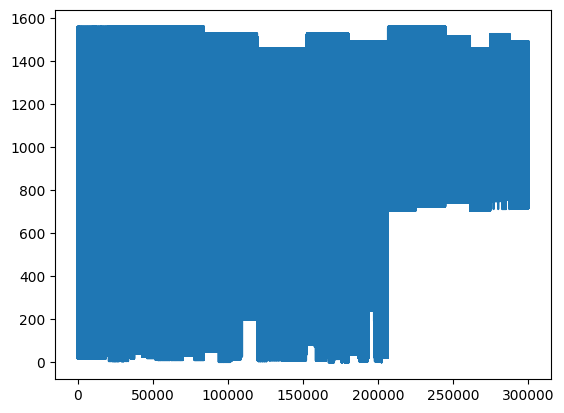

In [11]:
df['flight'].plot()

In [15]:
standardscaler = StandardScaler()
df["standardized_data"] = standardscaler.fit_transform(df[['flight']])

minmaxscaler = MinMaxScaler()
df["normalized_data"] = minmaxscaler.fit_transform(df[['flight']])

In [16]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,standardized_data,normalized_data
0,0,1408,0,1,0,4,1,0,2.17,1,5953,0.749163,0.902564
1,0,1387,0,2,0,0,1,0,2.33,1,5953,0.699947,0.889103
2,1,1213,0,2,0,2,1,0,2.17,1,5956,0.292161,0.777564
3,2,1559,0,0,0,3,1,0,2.25,1,5955,1.103046,0.999359
4,2,1549,0,0,0,0,1,0,2.33,1,5955,1.079610,0.992949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1477,5,0,1,1,4,1,10.08,49,69265,0.910871,0.946795
300149,2,1481,5,3,1,4,4,1,10.42,49,77105,0.920246,0.949359
300150,2,1486,5,2,1,4,4,1,13.83,49,79099,0.931964,0.952564
300151,2,1483,5,2,1,1,4,1,10.00,49,81585,0.924933,0.950641


<Axes: >

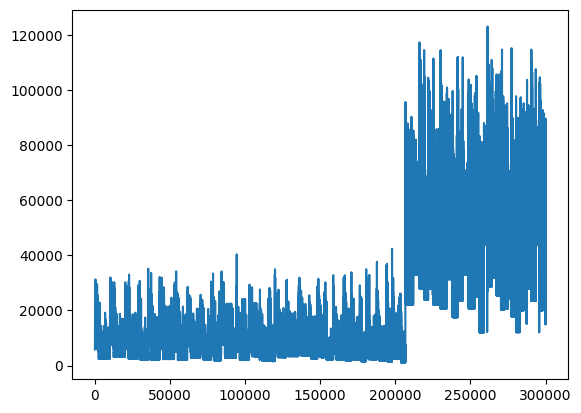

In [10]:
df['price'].plot()

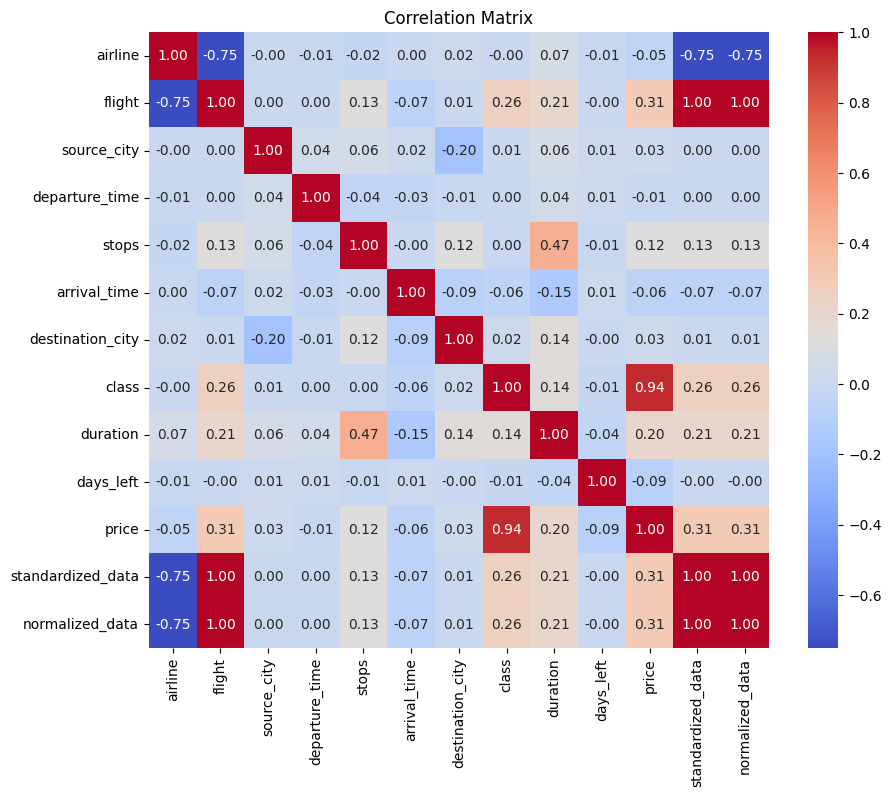

In [17]:
corr_matrix = df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

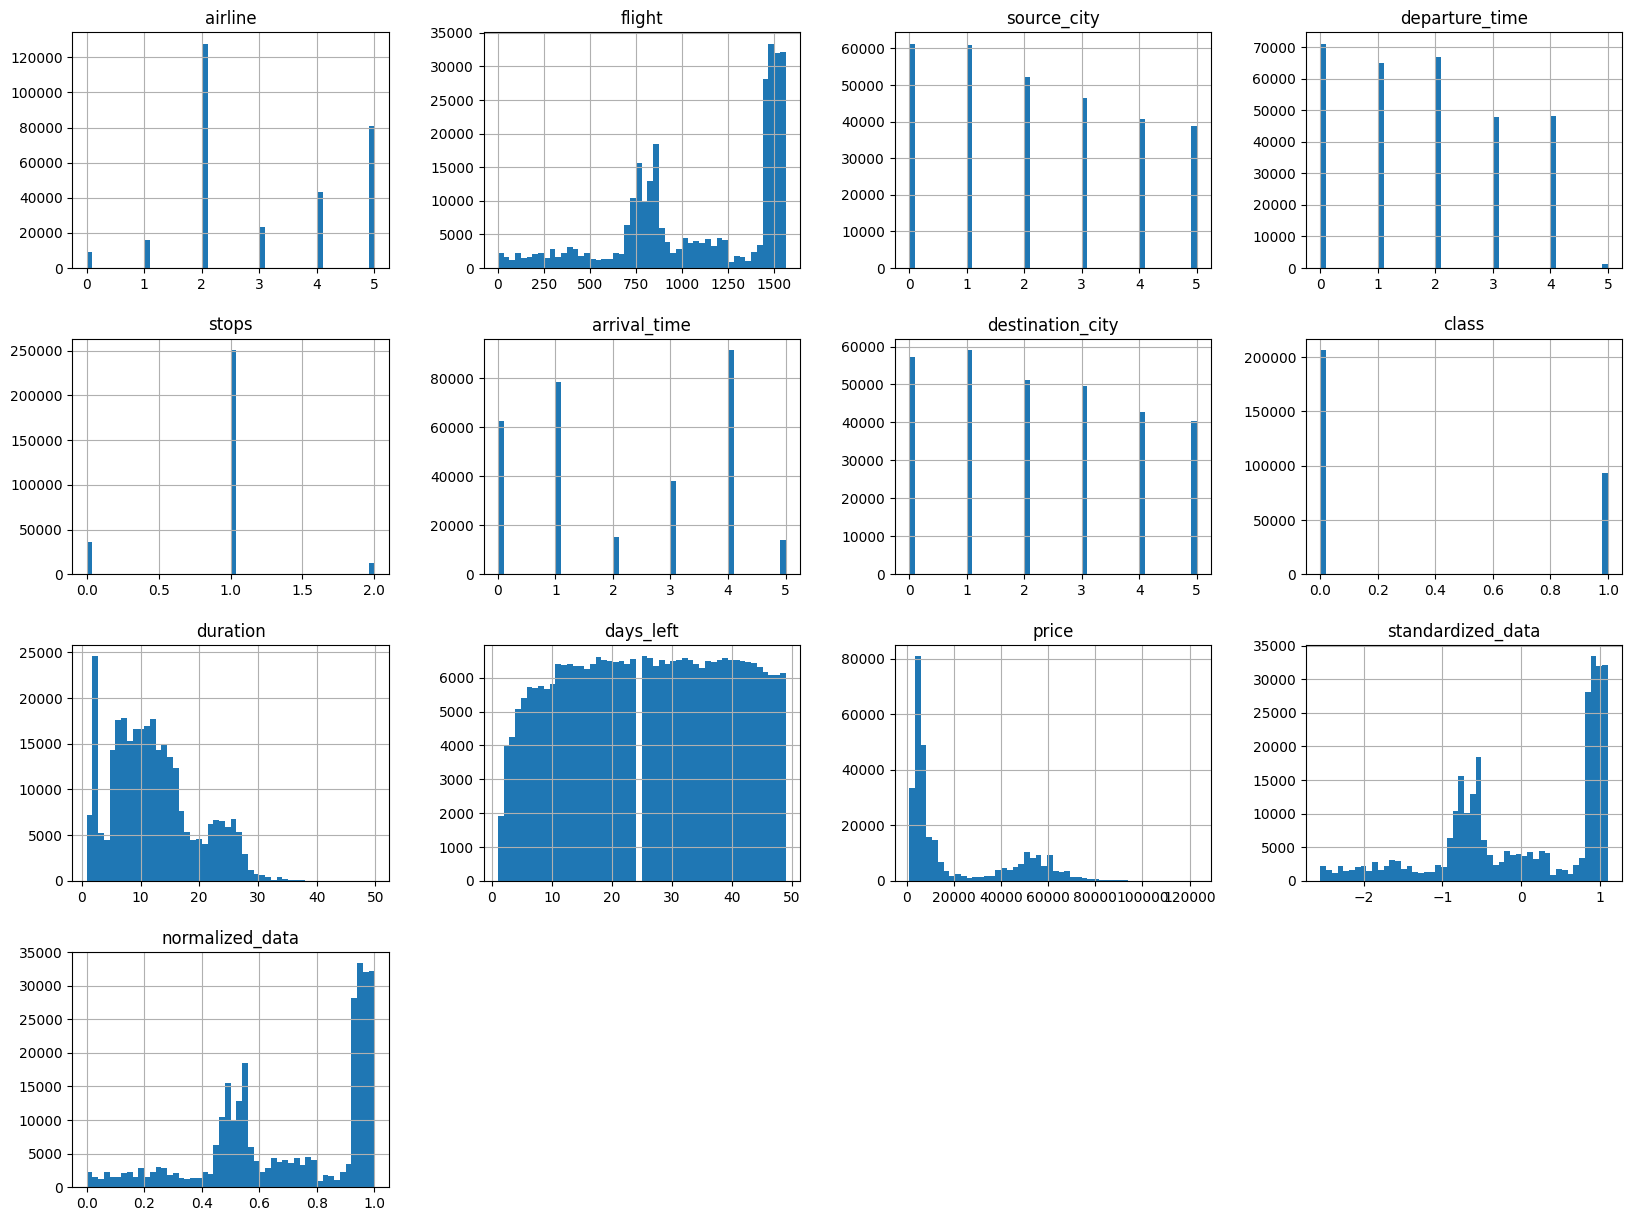

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
train_set, test_set = train_test_split(df, test_size=0.001, random_state=42)
print("train",len(train_set))
print("test",len(test_set))

train 299852
test 301


In [20]:
train_set.reset_index(drop=True, inplace= True)
train_set

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,standardized_data,normalized_data
0,4,689,0,1,1,5,5,0,4.92,46,3389,-0.935885,0.441667
1,5,745,2,1,1,0,4,0,18.08,45,6200,-0.804643,0.477564
2,5,907,4,1,2,0,1,0,14.92,11,10967,-0.424980,0.581410
3,5,798,0,3,1,1,1,0,3.50,19,2476,-0.680433,0.511538
4,5,764,4,3,1,3,1,1,23.67,26,29954,-0.760115,0.489744
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299847,2,1458,3,1,1,3,0,0,20.50,2,22869,0.866343,0.934615
299848,2,1513,2,4,1,4,5,1,25.42,7,44280,0.995241,0.969872
299849,5,846,3,4,1,0,1,0,13.67,29,5102,-0.567940,0.542308
299850,3,924,3,3,1,4,4,0,8.33,39,5574,-0.385139,0.592308


In [21]:
X_train = train_set.drop(['price'],axis=1)
# X_train.reset_index(drop= True,inplace= True)
X_train


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,standardized_data,normalized_data
0,4,689,0,1,1,5,5,0,4.92,46,-0.935885,0.441667
1,5,745,2,1,1,0,4,0,18.08,45,-0.804643,0.477564
2,5,907,4,1,2,0,1,0,14.92,11,-0.424980,0.581410
3,5,798,0,3,1,1,1,0,3.50,19,-0.680433,0.511538
4,5,764,4,3,1,3,1,1,23.67,26,-0.760115,0.489744
...,...,...,...,...,...,...,...,...,...,...,...,...
299847,2,1458,3,1,1,3,0,0,20.50,2,0.866343,0.934615
299848,2,1513,2,4,1,4,5,1,25.42,7,0.995241,0.969872
299849,5,846,3,4,1,0,1,0,13.67,29,-0.567940,0.542308
299850,3,924,3,3,1,4,4,0,8.33,39,-0.385139,0.592308


In [22]:
y_train = train_set['price']
y_train

0          3389
1          6200
2         10967
3          2476
4         29954
          ...  
299847    22869
299848    44280
299849     5102
299850     5574
299851     6339
Name: price, Length: 299852, dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [24]:
test_set.reset_index(drop= True, inplace= True)
X_test = test_set.drop(['price'],axis= 1)
y_test = test_set['price']

In [26]:
price_pred = lin_reg.predict(X_test)

In [39]:


mae = mean_absolute_error(y_test, price_pred)
mse = mean_squared_error(y_test, price_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, price_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(price_pred, y_test)
# lin_mse

Mean Absolute Error (MAE): 4487.15
Mean Squared Error (MSE): 46410801.88
Root Mean Squared Error (RMSE): 6812.55
R-squared (R²): 0.91


In [40]:
print(y_test.mean())
print(price_pred.mean())

20914.408637873756
21095.228693124536


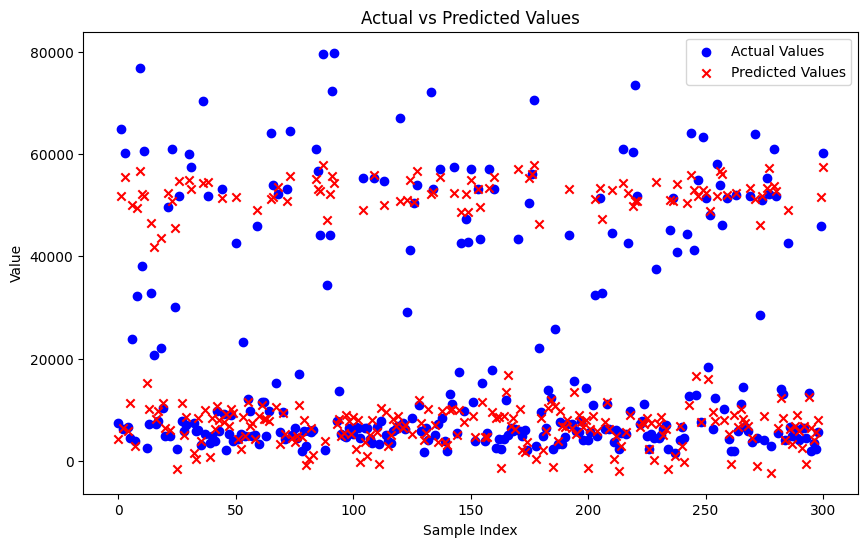

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='b', marker='o')
# Scatter plot for predicted values
plt.scatter(range(len(price_pred)), price_pred, label='Predicted Values', color='r', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

In [43]:
tree_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, tree_pred)
mse = mean_squared_error(y_test, tree_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, tree_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# housing_predictions = lin_reg.predict(housing_prepared)
# lin_mse = mean_squared_error(price_pred, y_test)
# lin_mse
tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

Mean Absolute Error (MAE): 698.33
Mean Squared Error (MSE): 4558611.62
Root Mean Squared Error (RMSE): 2135.09
R-squared (R²): 0.99


np.float64(2135.090541701325)

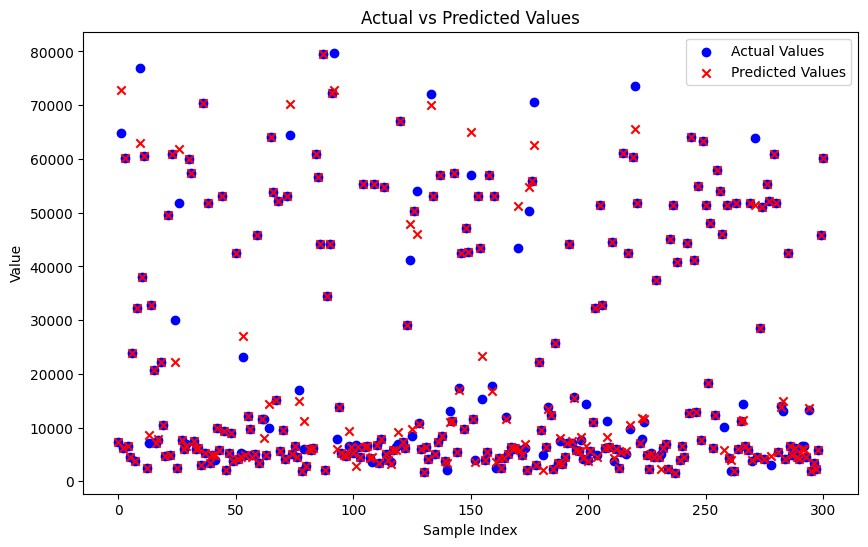

In [44]:
plt.figure(figsize=(10, 6))
# plt.plot(y_test, label='Actual Values', marker='o')
# plt.plot(tree_pred, label='Predicted Values', marker='x')
# Plotting actual values
# plt.plot(y_test, label='Actual Values', marker='o', linestyle='-', color='b')

# # Plotting predicted values
# plt.plot(tree_pred, label='Predicted Values', marker='x', linestyle='-', color='r')
plt.scatter(range(len(y_test)), y_test, label='Actual Values', color='b', marker='o')

# Scatter plot for predicted values
plt.scatter(range(len(tree_pred)), tree_pred, label='Predicted Values', color='r', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [ 7786.15894371  5051.75947567  8173.84984162  6902.5858488
  6817.65276323  6874.65670173  5006.60191813  7556.07108666
 11044.196064    7920.4354047 ]
Mean: 7313.396804825007
Standard deviation: 1623.374879128701


In [47]:
lin_scores = cross_val_score(lin_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [10930.05733622  5645.4600247   6790.55196638  7695.8322336
  6731.90844969  6700.53943928  6172.69406736  7316.39484284
  4934.94624221  5199.3500907 ]
Mean: 6811.773469297723
Standard deviation: 1609.5578755103832


In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [49]:
forest_pred = forest_reg.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 691.36
Mean Squared Error (MSE): 3247149.24
Root Mean Squared Error (RMSE): 1801.98
R-squared (R²): 0.99


np.float64(1801.9848052646873)

In [50]:
lin_scores = cross_val_score(forest_reg,X_test, y_test,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [6838.04042353 3869.3755746  6085.19699461 6223.86926059 6839.77051036
 4932.16495671 4321.5244868  6310.9971334  6698.17332469 4104.74782474]
Mean: 5622.386049003918
Standard deviation: 1127.485585793491


In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

d:\RND\Machine_Learning\mlenv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [122]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [123]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3262.9081464785445 {'max_features': 2, 'n_estimators': 3}
2766.135899620418 {'max_features': 2, 'n_estimators': 10}
2633.3030934640033 {'max_features': 2, 'n_estimators': 30}
2866.827836653299 {'max_features': 4, 'n_estimators': 3}
2619.55450288421 {'max_features': 4, 'n_estimators': 10}
2540.214468200826 {'max_features': 4, 'n_estimators': 30}
2781.0058483521225 {'max_features': 6, 'n_estimators': 3}
2539.0479346982142 {'max_features': 6, 'n_estimators': 10}
2477.812958047169 {'max_features': 6, 'n_estimators': 30}
2733.214170861234 {'max_features': 8, 'n_estimators': 3}
2496.0709607273106 {'max_features': 8, 'n_estimators': 10}
2426.5198661784148 {'max_features': 8, 'n_estimators': 30}
3199.3286074334446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2901.890419185458 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3036.441879640534 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2806.264526958967 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [124]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00573409, 0.04764818, 0.00610677, 0.00247966, 0.00707452,
       0.00276376, 0.01051968, 0.85637271, 0.04310383, 0.01819681])